In [105]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.metrics import mean_squared_error, regression
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [6]:
data=pd.read_csv(r'C:\Users\HP\Downloads\ChickWeight.csv', index_col=[0])

In [7]:
data_copy=data.copy()

In [42]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
data_copy

,weight,Time,Chick,Diet
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
...,...,...,...,...
574,175,14,50,4
575,205,16,50,4
576,234,18,50,4
577,264,20,50,4


In [9]:
data_copy.describe()

,weight,Time,Chick,Diet
count,578.000000,578.000000,578.000000,578.000000
mean,121.818339,10.717993,25.750865,2.235294
std,71.071960,6.758400,14.568795,1.162678
min,35.000000,0.000000,1.000000,1.000000
25%,63.000000,4.000000,13.000000,1.000000
50%,103.000000,10.000000,26.000000,2.000000
75%,163.750000,16.000000,38.000000,3.000000
max,373.000000,21.000000,50.000000,4.000000


In [36]:
data.isnull().any(axis=1).sum()

0

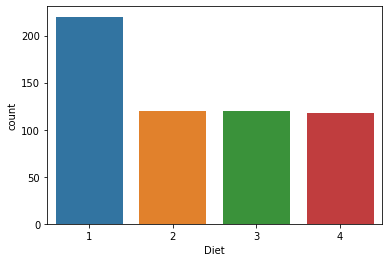

In [25]:
ax=sns.countplot(x="Diet", data=data)

In [14]:
data_copy['Diet'].value_counts()

1    220
3    120
2    120
4    118
Name: Diet, dtype: int64

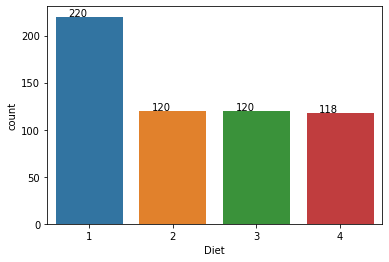

In [29]:
ax=sns.countplot(x="Diet", data=data)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))


In [49]:
data_pivot = data_copy.pivot_table(values="weight", index=['Chick', 'Diet'], columns='Time')
pd.set_option('display.max_rows', None)
data_pivot

,Time,0,2,4,6,8,10,12,14,16,18,20,21
Chick,Diet,,,,,,,,,,,,
1,1,42.0,51.0,59.0,64.0,76.0,93.0,106.0,125.0,149.0,171.0,199.0,205.0
2,1,40.0,49.0,58.0,72.0,84.0,103.0,122.0,138.0,162.0,187.0,209.0,215.0
3,1,43.0,39.0,55.0,67.0,84.0,99.0,115.0,138.0,163.0,187.0,198.0,202.0
4,1,42.0,49.0,56.0,67.0,74.0,87.0,102.0,108.0,136.0,154.0,160.0,157.0
5,1,41.0,42.0,48.0,60.0,79.0,106.0,141.0,164.0,197.0,199.0,220.0,223.0
6,1,41.0,49.0,59.0,74.0,97.0,124.0,141.0,148.0,155.0,160.0,160.0,157.0
7,1,41.0,49.0,57.0,71.0,89.0,112.0,146.0,174.0,218.0,250.0,288.0,305.0
8,1,42.0,50.0,61.0,71.0,84.0,93.0,110.0,116.0,126.0,134.0,125.0,NaN
9,1,42.0,51.0,59.0,68.0,85.0,96.0,90.0,92.0,93.0,100.0,100.0,98.0


In [51]:
data_pivot.isnull().value_counts()

AttributeError: 'DataFrame' object has no attribute 'value_counts'

In [47]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', None)
print(data)

     weight  Time  Chick  Diet
1        42     0      1     1
2        51     2      1     1
3        59     4      1     1
4        64     6      1     1
5        76     8      1     1
6        93    10      1     1
7       106    12      1     1
8       125    14      1     1
9       149    16      1     1
10      171    18      1     1
11      199    20      1     1
12      205    21      1     1
13       40     0      2     1
14       49     2      2     1
15       58     4      2     1
16       72     6      2     1
17       84     8      2     1
18      103    10      2     1
19      122    12      2     1
20      138    14      2     1
21      162    16      2     1
22      187    18      2     1
23      209    20      2     1
24      215    21      2     1
25       43     0      3     1
26       39     2      3     1
27       55     4      3     1
28       67     6      3     1
29       84     8      3     1
30       99    10      3     1
31      115    12      3     1
32      

In [54]:
data_pivot.corr()

Time,0,2,4,6,8,10,12,14,16,18,20,21
Time,,,,,,,,,,,,
0,1.000000,0.206907,-0.024334,-0.093256,-0.165285,-0.175598,-0.219721,-0.251033,-0.308091,-0.322173,-0.320232,-0.302121
2,0.206907,1.000000,0.770837,0.594517,0.455669,0.368856,0.313899,0.204819,0.137491,0.130861,0.141888,0.136358
4,-0.024334,0.770837,1.000000,0.899768,0.804070,0.720033,0.656008,0.547637,0.458204,0.430526,0.433821,0.415950
6,-0.093256,0.594517,0.899768,1.000000,0.927595,0.873471,0.814419,0.718933,0.620179,0.572364,0.569159,0.530969
8,-0.165285,0.455669,0.804070,0.927595,1.000000,0.974043,0.930311,0.874190,0.780307,0.715859,0.674988,0.629349
10,-0.175598,0.368856,0.720033,0.873471,0.974043,1.000000,0.976556,0.940346,0.858594,0.790778,0.739554,0.692719
12,-0.219721,0.313899,0.656008,0.814419,0.930311,0.976556,1.000000,0.982128,0.927703,0.863681,0.803587,0.764806
14,-0.251033,0.204819,0.547637,0.718933,0.874190,0.940346,0.982128,1.000000,0.974019,0.926022,0.875112,0.840192
16,-0.308091,0.137491,0.458204,0.620179,0.780307,0.858594,0.927703,0.974019,1.000000,0.978915,0.943425,0.918572


In [55]:
chicks = data_pivot.stack().reset_index(name='weight')

In [58]:
data

,weight,Time,Chick,Diet
1,42,0,1,1
2,51,2,1,1
3,59,4,1,1
4,64,6,1,1
5,76,8,1,1
6,93,10,1,1
7,106,12,1,1
8,125,14,1,1
9,149,16,1,1
10,171,18,1,1


In [57]:
chicks.isnull().any(axis=1).sum()

0

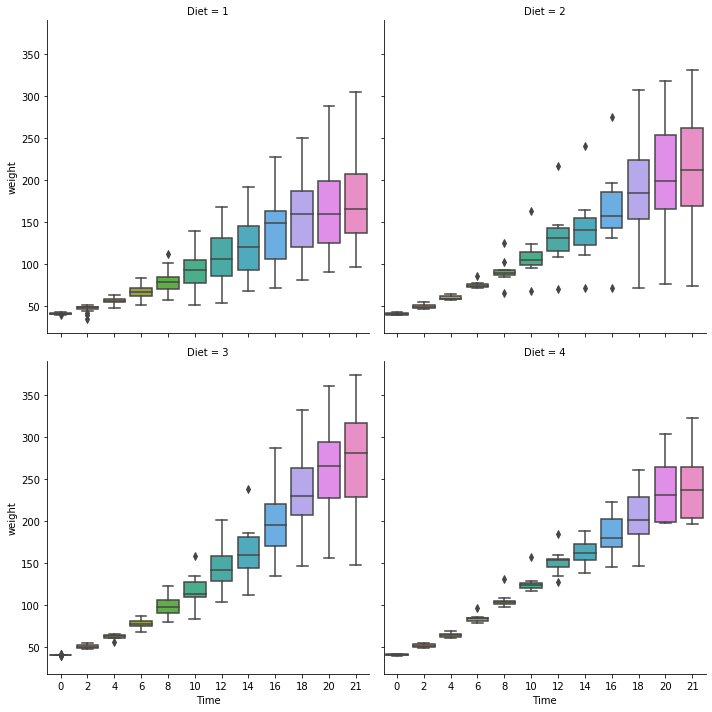

In [59]:
sns.catplot(x="Time", y="weight", col="Diet", data=data, kind="box", col_wrap=2)

In [88]:
remov_pivot = data_pivot.stack().reset_index(name='weight')


In [89]:
remov_pivot

,Chick,Diet,Time,weight
0,1,1,0,42.0
1,1,1,2,51.0
2,1,1,4,59.0
3,1,1,6,64.0
4,1,1,8,76.0
5,1,1,10,93.0
6,1,1,12,106.0
7,1,1,14,125.0
8,1,1,16,149.0
9,1,1,18,171.0


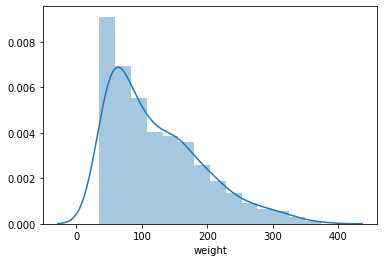

In [62]:
sns.distplot(data_copy["weight"])

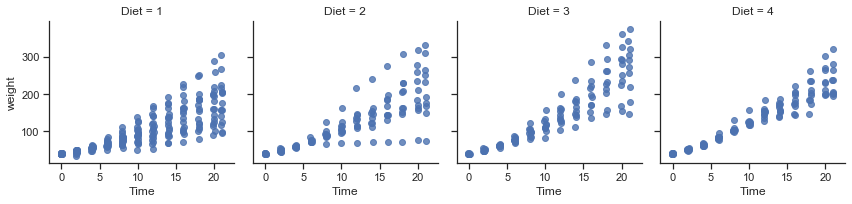

In [87]:
g = sns.FacetGrid(chicks, col="Diet", margin_titles=True)
g.map(sns.regplot, "Time", "weight",fit_reg=False, x_jitter=.1)

In [90]:
data_copy.groupby('Diet').agg(
    max_weight=('weight', max),
    min_weight=('weight', min),
    avg_weight=('weight', 'mean'),
    total_weight=('weight', sum),
    num_chicks=('Chick', 'count')    
)

,max_weight,min_weight,avg_weight,total_weight,num_chicks
Diet,,,,,
1,305,35,102.645455,22582,220
2,331,39,122.616667,14714,120
3,373,39,142.950000,17154,120
4,322,39,135.262712,15961,118


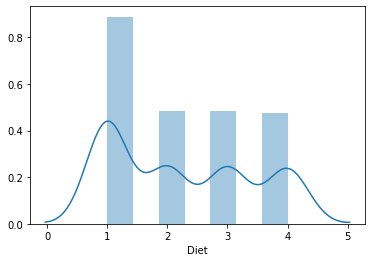

In [63]:
sns.distplot(data_copy["Diet"])

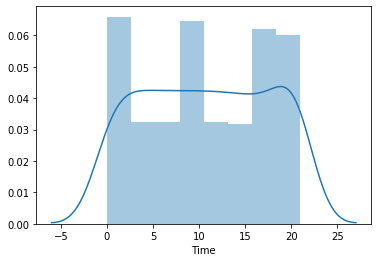

In [65]:
sns.distplot(data_copy["Time"])

In [66]:
data_copy.corr()

,weight,Time,Chick,Diet
weight,1.000000,0.837102,0.179355,0.208196
Time,0.837102,1.000000,0.011536,0.018605
Chick,0.179355,0.011536,1.000000,0.952545
Diet,0.208196,0.018605,0.952545,1.000000


In [69]:
weight_group=data.groupby('weight')

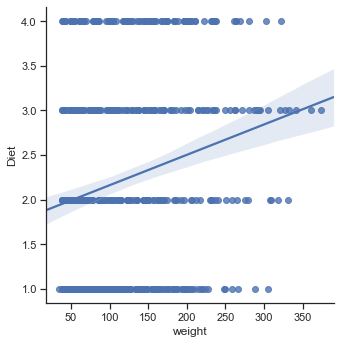

In [77]:

sns.pairplot(data_copy,x_vars=['weight'],y_vars=['Diet'], aspect=1,height=5, kind='reg')

In [91]:
features= ['Diet', 'Time']

In [95]:
train, test=train_test_split(data_copy, test_size=0.2, random_state=42)

In [96]:
train.head()

,weight,Time,Chick,Diet
249,90,8,23,2
276,164,14,25,2
69,155,16,6,1
470,184,18,41,4
64,74,6,6,1


In [112]:
x_train= train[features]
y_train= train['weight']

x_test= test[features]
y_test= test['weight']

In [99]:
y_train

249     90
276    164
69     155
470    184
64      74
387    327
61      41
16      72
200     62
400    373
287    136
458    262
89      84
466    124
118    120
357    107
378     49
34     187
1       42
572    122
376    147
323    134
212     58
353     41
23     209
412    220
256    175
90      93
178     49
189     98
19     122
182     54
299    115
145     48
266     72
522     82
552    261
391     64
518    196
193    133
566    237
55     141
527    173
47     160
94     134
248     73
109     44
491    184
578    264
450     55
408    166
336    122
355     65
219    115
369     96
272     78
442    109
70     160
405     98
262     68
185     61
438     50
229    275
150     71
125    139
437     42
204     88
516    174
221     40
401     39
415     56
341     42
533     66
426     49
115     96
142    195
538    157
8      125
561    152
20     138
173     68
423    169
57     197
281     42
554    322
422    157
497     42
478    126
50      42
546     80
26      39

In [107]:
modelRegr =  LinearRegression()
modelRidge = Ridge(alpha=0.05)
modelLasso = Lasso(alpha=0.05)

In [108]:
modelRegr.fit(x_train, y_train)
modelRidge.fit(x_train, y_train)
modelLasso.fit(x_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [127]:
y_predRegr=modelRegr.predict(x_train)
y_predRidge=modelRidge.predict(x_train)
y_predLasso=modelLasso.predict(x_train)

y_predRegrTst=modelRegr.predict(x_test)
y_predRidgeTst=modelRidge.predict(x_test)
y_predLassoTst=modelLasso.predict(x_test)

In [114]:
from sklearn.metrics import mean_absolute_error

In [128]:
MAE_modelRegr=mean_absolute_error(y_predRegr, y_train)
print(MAE_modelRegr)

MAE_modelRegrTst=mean_absolute_error(y_predRegrTst, y_test)
print(MAE_modelRegrTst)

25.53093334464712
25.089518088238634


In [129]:
MAE_modelRidge=mean_absolute_error(y_predRidge, y_train)
print(MAE_modelRidge)

MAE_modelRidgeTst=mean_absolute_error(y_predRidgeTst, y_test)
print(MAE_modelRidgeTst)

25.530639591189125
25.088896483089158


In [130]:
MAE_modelLasso=mean_absolute_error(y_predLasso, y_train)
print(MAE_modelLasso)

MAE_modelLassoTst=mean_absolute_error(y_predLassoTst, y_test)
print(MAE_modelLassoTst)

25.520745780033362
25.067815815830564


In [132]:
Regr_acc=modelRegr.score(x_test, y_test)
Ridge_acc=modelRidge.score(x_test, y_test)
Lasso_acc=modelLasso.score(x_test, y_test)


In [133]:
print(Regr_acc)
print (Ridge_acc)
print (Lasso_acc)

0.7517429848500023
0.7517478657907893
0.7519109019474471


In [135]:
#Feature Engineering

In [134]:
from sklearn.preprocessing import StandardScaler

In [144]:
df = StandardScaler().fit_transform(data)

In [145]:
columns=list(data.columns)

In [146]:
df=pd.DataFrame(df, columns=columns)

In [147]:
df

,weight,Time,Chick,Diet
0,-1.124036,-1.587251,-1.700367,-1.063376
1,-0.997295,-1.291067,-1.700367,-1.063376
2,-0.884635,-0.994882,-1.700367,-1.063376
3,-0.814223,-0.698698,-1.700367,-1.063376
4,-0.645234,-0.402514,-1.700367,-1.063376
5,-0.405832,-0.106329,-1.700367,-1.063376
6,-0.222761,0.189855,-1.700367,-1.063376
7,0.044806,0.486040,-1.700367,-1.063376
8,0.382784,0.782224,-1.700367,-1.063376
9,0.692597,1.078408,-1.700367,-1.063376


In [149]:
train, test=train_test_split(df, test_size=0.2, random_state=42)

In [153]:
x_trainE= train[features]
y_trainE= train['weight']

x_testE= test[features]
y_testE= test['weight']

In [154]:
x_trainE

,Diet,Time
248,-0.202548,-0.402514
275,-0.202548,0.486040
68,-1.063376,0.782224
469,1.519109,1.078408
63,-1.063376,-0.698698
386,0.658281,1.374593
60,-1.063376,-1.587251
15,-1.063376,-0.698698
199,-1.063376,-0.698698
399,0.658281,1.522685


In [155]:
modelRegr =  LinearRegression()
modelRidge = Ridge(alpha=0.05)
modelLasso = Lasso(alpha=0.05)

In [156]:
modelRegr.fit(x_trainE, y_trainE)
modelRidge.fit(x_trainE, y_trainE)
modelLasso.fit(x_trainE, y_trainE)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [159]:
y_predRegrE=modelRegr.predict(x_trainE)
y_predRidgeE=modelRidge.predict(x_trainE)
y_predLassoE=modelLasso.predict(x_trainE)

y_predRegrTstE=modelRegr.predict(x_testE)
y_predRidgeTstE=modelRidge.predict(x_testE)
y_predLassoTstE=modelLasso.predict(x_testE)

In [162]:
MAE_modelRegrE=mean_absolute_error(y_predRegrE, y_trainE)
print(MAE_modelRegrE)

MAE_modelRegrTstE=mean_absolute_error(y_predRegrTstE, y_testE)
print(MAE_modelRegrTstE)

0.3595376822364727
0.3533214810482696


In [163]:
MAE_modelRidgeE=mean_absolute_error(y_predRidgeE, y_trainE)
print(MAE_modelRidgeE)

MAE_modelRidgeTstE=mean_absolute_error(y_predRidgeTstE, y_testE)
print(MAE_modelRidgeTstE)

0.3595287095278814
0.3532975712798024


In [164]:
MAE_modelLassoE=mean_absolute_error(y_predLassoE, y_trainE)
print(MAE_modelLassoE)

MAE_modelLassoTstE=mean_absolute_error(y_predLassoTstE, y_testE)
print(MAE_modelLassoTstE)

0.3510348283093829
0.32643670940279934


In [167]:
Regr_accE=modelRegr.score(x_testE, y_testE)
Ridge_accE=modelRidge.score(x_testE, y_testE)
Lasso_accE=modelLasso.score(x_testE, y_testE)

print(Regr_accE)
print (Ridge_accE)
print (Lasso_accE)

0.7517429848500023
0.7517512058676747
0.7606100546136852


In [170]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [172]:
modelDTreeRegr = DecisionTreeRegressor(max_leaf_nodes = 25, random_state=1) 
modelForest = RandomForestRegressor(n_estimators=70, max_depth=3, random_state=1)
modelMLPRegr = MLPRegressor(solver = 'lbfgs', random_state = 1, hidden_layer_sizes =[10])

In [173]:
modelDTreeRegr.fit(x_trainE, y_trainE)
modelForest.fit(x_trainE, y_trainE)
modelMLPRegr.fit(x_trainE, y_trainE)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=[10], learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [177]:
y_predDTRegrE=modelDTreeRegr.predict(x_trainE)
y_predForestE=modelForest.predict(x_trainE)
y_predMLRegrE=modelMLPRegr.predict(x_trainE)

y_predDTRegrTstE=modelDTreeRegr.predict(x_testE)
y_predForestTstE=modelForest.predict(x_testE)
y_predMLRegrTstE=modelMLPRegr.predict(x_testE)

In [178]:
MAE_modelDTreeRegrE=mean_absolute_error(y_predDTRegrE, y_trainE)
print(MAE_modelDTreeRegrE)

MAE_modelDTreeRegrET=mean_absolute_error(y_predDTRegrTstE, y_testE)
print(MAE_modelDTreeRegrE)

0.2852478733847512
0.2852478733847512


In [181]:
TreeRegr_acc=modelDTreeRegr.score(x_testE, y_testE)
Forest_acc=modelForest.score(x_testE, y_testE)
MLPReg_acc=modelMLPRegr.score(x_testE, y_testE)

In [182]:
print(TreeRegr_acc)
print(Forest_acc)
print(MLPReg_acc)


0.7114103880951252
0.7351842984092298
0.7333628641023227
